
# Project: Investigate a Dataset (Investigating the movie database for insights.)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I selected the movie database dataset so as to investigate and find out which movies do best. What genres do people prefer more and which genres perform best in the box office? For these insights, I will be looking at variables like genre and revenue generated by different movies and their ratings.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

> Above I import the relevant python libraries required for the project. Pandas, NumPy and Matplotlib for graphs.

<a id='wrangling'></a>
## Data Wrangling

> Below I load the data onto the notebook using the read csv function in order to familiarize myself further with the dataset and determine what to clean from the data to remain with the relevant fields necessary for analysis.
### General Properties

In [4]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Benji\\Downloads\\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Above I check for fields with null values. I note the columns production values, tagline, homepage and keywords have a substantial amount of null values. Fortunately, I will not be needing them in my analysis.

In [37]:
df.shape

(10866, 21)

### Data Cleaning 

In [10]:
df2 = df[["original_title","budget","revenue","genres","vote_average"]]
df2.head()

,original_title,budget,revenue,genres,vote_average
0,Jurassic World,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,6.5
1,Mad Max: Fury Road,150000000,378436354,Action|Adventure|Science Fiction|Thriller,7.1
2,Insurgent,110000000,295238201,Adventure|Science Fiction|Thriller,6.3
3,Star Wars: The Force Awakens,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,7.5
4,Furious 7,190000000,1506249360,Action|Crime|Thriller,7.3


> In the above cell, I make a subset of the main dataset by creating a new dataframe with the relevant variables that I need to answer my questions. The new dataframe consists of the title, budget, revenue, genres and vote average fields.

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10866 non-null  object 
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_average    10866 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 424.6+ KB


> In the above operation, I check which fields have null values. Of the 5 fields, only the genres field falls short by a few entries. The rest of the fields don't have any null values.

In [19]:
df3= df[['original_title','genres','revenue','vote_average']];
df3.head()

,original_title,genres,revenue,vote_average
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,1513528810,6.5
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,378436354,7.1
2,Insurgent,Adventure|Science Fiction|Thriller,295238201,6.3
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2068178225,7.5
4,Furious 7,Action|Crime|Thriller,1506249360,7.3


> In the above operation, I create a new dataframe without the budget column to narrow down the relevant data.

<a id='eda'></a>
## Exploratory Data Analysis



### Which genres do well in the box office?

In [39]:
df4= df3.sort_values(by='revenue', ascending=False)
df_top = df4.head(50)
df_top.head(50)

,original_title,genres,revenue,vote_average
1386,Avatar,Action|Adventure|Fantasy|Science Fiction,2781505847,7.1
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2068178225,7.5
5231,Titanic,Drama|Romance|Thriller,1845034188,7.3
4361,The Avengers,Science Fiction|Action|Adventure,1519557910,7.3
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,1513528810,6.5
4,Furious 7,Action|Crime|Thriller,1506249360,7.3
14,Avengers: Age of Ultron,Action|Adventure|Science Fiction,1405035767,7.4
3374,Harry Potter and the Deathly Hallows: Part 2,Adventure|Family|Fantasy,1327817822,7.7
5422,Frozen,Animation|Adventure|Family,1274219009,7.5
5425,Iron Man 3,Action|Adventure|Science Fiction,1215439994,6.9


> To narrow down the data further, I decide to use sampling where I pick the top 50 highest grossing movies of all time which I feel is the most relevant sample to answer my question. 

>From looking at this subset of the top 50 highest grossing movies of all time, majority of them are either in the Action or Adventure genres or both. We also see Fantasy and Science Fiction appearing a lot in this list.

In [40]:
df_topave = df_top["vote_average"].mean()
print(df_topave)

7.006


In [42]:
df_ave = df["vote_average"].mean()
print(df_ave)

5.974921774342001


> The average vote of the top 50 grossing movies is 7.006 out of 10. The average vote for movies in the whole dataset is 5.97. This shows that there's a direct correlation between revenue generated and how much people loved a movie. 

### Is there a correlation between rating and revenue and profitability?

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'vote_average'}>, <AxesSubplot:>]],
      dtype=object)

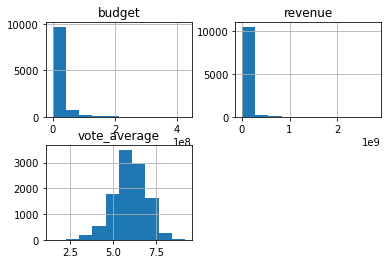

In [15]:
df2.hist()

> Above we see histogram plots of the budget, revenue and vote average. As seen in the vote average histogram, most movie ratings fall between the 6.0 to 7.0 range as we learnt in the above section.

<AxesSubplot:title={'center':'Vote average to Revenue Comparison'}, xlabel='vote_average', ylabel='revenue'>

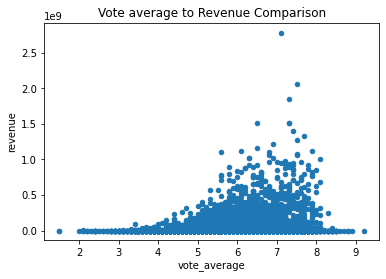

In [14]:
df2.plot(x='vote_average', y='revenue',kind='scatter', title= 'Vote average to Revenue Comparison')

> From the scatter graph, we can see a higher number of high grossing movies with a higher rating most of them falling between a rating of 7 and 8.

In [57]:
df3.describe()

,revenue,vote_average
count,1.086600e+04,10866.000000
mean,3.982332e+07,5.974922
std,1.170035e+08,0.935142
min,0.000000e+00,1.500000
25%,0.000000e+00,5.400000
50%,0.000000e+00,6.000000
75%,2.400000e+07,6.600000
max,2.781506e+09,9.200000


> From the above table we see that the movies in the 75th percentile with a vote average of 6.6 had the highest revenue of all quartiles in the entire dataset. This indicates that there is a correlation between rating and revenue.

In [63]:
df_count = df3[df3["vote_average"]>6.0]
count = df_count.count()
print (count)

original_title    5315
genres            5300
revenue           5315
vote_average      5315
dtype: int64


>Above we see that almost half of all the movies scored a rating of 6.0 or more in vote average.

In [32]:
df2['profit'] = df2['revenue'] - df2['budget']
df2.head()

C:\Users\Benji\AppData\Local\Temp\ipykernel_24620\214238373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['profit'] = df2['revenue'] - df2['budget']


,original_title,budget,revenue,genres,vote_average,profit
0,Jurassic World,150000000.0,1.513529e+09,Action|Adventure|Science Fiction|Thriller,6.5,1.363529e+09
1,Mad Max: Fury Road,150000000.0,3.784364e+08,Action|Adventure|Science Fiction|Thriller,7.1,2.284364e+08
2,Insurgent,110000000.0,2.952382e+08,Adventure|Science Fiction|Thriller,6.3,1.852382e+08
3,Star Wars: The Force Awakens,200000000.0,2.068178e+09,Action|Adventure|Science Fiction|Fantasy,7.5,1.868178e+09
4,Furious 7,190000000.0,1.506249e+09,Action|Crime|Thriller,7.3,1.316249e+09


> Above we find profits by subtracting budget from revenue and display the results in a new column.

<AxesSubplot:title={'center':'Comparison between Profit and Vote Average'}, xlabel='vote_average', ylabel='profit'>

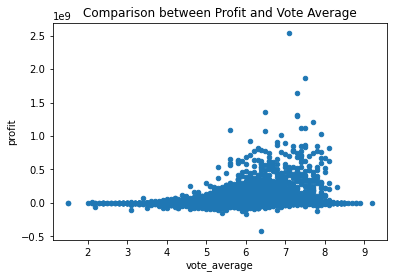

In [40]:
df2.plot.scatter(x='vote_average', y='profit', title='Comparison between Profit and Vote Average')

> In the above scatter plot, we see a good number of films with higher ratings were profitable. However, we see there are some that experienced loss.

<a id='conclusions'></a>
## Conclusions

>From this brief analysis, I came to the following conclusions: </br>
<ol>1. The genres Action and Adventure coupled with Fantasy and/or Science Fiction are the most popular genres in the box office mainly based on the revenue they generated and also the ratings received from audiences. </ol>
<ol>2. Movies that got good ratings tended to perform better in revenue and were profitable. The more a movie was loved or rated higher, the more people went to watch it or bought hence the higher revenue. It was not necessarily true in all instances due to some outliers but it was seen in majority of the cases. Hence higher ratings and high revenue are correlated.</ol>




### Limitations

> I experienced a limitation where I couldn't plot a graph showing the relationship between genre and revenue due to how data in the column section was fed. Hence the reason why I used sampling by taking the top movies. The sample may be small but it answers the question on performance by using the highest performers.